In [1]:
import os
import sys

sys.path.append('/home/atom/MiRAI')

In [2]:
from rich import print, inspect
from src.utils import load_config, write_config
from src.utils.camera import load_cameras
from src.detect import detect_objects
from src.utils import cv2pil

cfg = load_config('/home/atom/MiRAI/scripts/tracking/detect_and_track.yaml')
inspect(cfg, value=False)

╭──────────────────────── <class 'omegaconf.dictconfig.DictConfig'> ────────────────────────╮
│   cameras = [{'label': 'left', 'video_path':                                              │
│             '/mnt/ssd/atom//MiRAI/20210620/offside_1/left_raw.mp4', 'keypoint_xml':       │
│             '/mnt/ssd/atom/MiRAI/20210620/left_keypoints_raw_2.xml',                      │
│             'calibration_video_path':                                                     │
│             '/mnt/ssd/atom/MiRAI/20210620/left_checkerboard.mp4', 'x_range': [0, 52.5],   │
│             'y_range': [0, 68], 'camera_matrix': None, 'camera_matrix_path':              │
│             '/mnt/ssd/atom/MiRAI/20210620/left_checkerboard.mp4.camera_matrix.npy',       │
│             'distortion_coefficients': None, 'distortion_coefficients_path':              │
│             '/mnt/ssd/atom/MiRAI/20210620/left_checkerboard.mp4.distortion_coefficients.… │
│             {'label': 'right', 'video_path':                                              │
│             '/mnt/ssd/atom/MiRAI/20210620/offside_1/right_raw.mp4', 'keypoint_xml':       │
│             '/mnt/ssd/atom/MiRAI/20210620/right_keypoints_raw_2.xml',                     │
│             'calibration_video_path':                                                     │
│             '/mnt/ssd/atom/MiRAI/20210620/right_checkerboard.mp4', 'x_range': [52.5,      │
│             105], 'y_range': [0, 68], 'camera_matrix': None, 'camera_matrix_path':        │
│             '/mnt/ssd/atom/MiRAI/20210620/right_checkerboard.mp4.camera_matrix.npy',      │
│             'distortion_coefficients': None, 'distortion_coefficients_path':              │
│             '/mnt/ssd/atom/MiRAI/20210620/right_checkerboard.mp4.distortion_coefficients… │
│ detection = {'model_name': 'yolov5x', 'size': 3000, 'batch_size': 32}                     │
│    outdir = '/mnt/ssd/atom/logs/MiRAI/outputs/2021-11-29_04-47-51'                        │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

In [3]:

# load cameras
"""
TODO: camera init checklist
    - are camera videos undistored? -> ...
    - will matrix parameters be saved? -> yes, they are saved to .npy files
"""
cameras = load_cameras(cfg.cameras)


In [4]:
cameras

In [5]:
# detection
"""
TODO: detection checklist
    - return results as list of Detection Objects -> OK
    - option to visualize detections? 
    - aggregate detections from multiple cameras? 
    - drop detections that are out of bounds -> OK
    - Are detection results visualized and saved?
"""
player_detections, ball_detections = detect_objects(
    cameras,
    model_name='yolov5x',
    size=3000,
    batch_size=8,
    filter_range=False
)

print("N ball detections:", sum(len(x) for x in ball_detections.values()))
print("N player detections:", sum(len(x) for x in player_detections.values()))

Using cache found in /home/atom/.cache/torch/hub/ultralytics_yolov5_master


0it [00:00, ?it/s]

Unexpected end.


0it [00:00, ?it/s]

Unexpected end.


N ball detections: 3129

N player detections: 33489

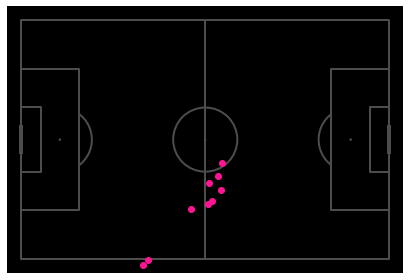

In [8]:
%matplotlib inline
from mplsoccer import Pitch
import matplotlib.pyplot as plt

xs,ys =[],[]
for pd in player_detections[700]:
    xs.append(pd.py)
    ys.append(pd.px)

pitch = Pitch(pitch_color='black', line_color=(.3,.3,.3), pitch_type='custom', pitch_length=105, pitch_width=68) 
fig, ax = pitch.draw()
plt.scatter(xs, ys, color='deeppink')
plt.show()

In [12]:
for pd in player_detections[100]:
    print(pd.camera.label)
    

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right